In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Using Theano backend.


In [2]:
X_train = np.load('sdss/training_images.50k.npy')
X_train = X_train[:500, 1:4, 8:-8, 8:-8]

In [3]:
idx = np.unique(np.where(np.min(X_train, axis=(1, 2, 3)) < 21.5)[0])
X_train = X_train[idx]

In [4]:
def normalize(array):
    return (array - array.min()) / (array.max() - array.min())

for i in range(3):
    X_train[:, i, :, :] = normalize(X_train[:, i, :, :])
    
X_train = 1.0 - X_train
print(np.min(X_train), np.max(X_train))

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

0.0 1.0
X_train shape: (179, 3, 32, 32)
179 train samples


# Original SDSS postage stamps ($r$ band)

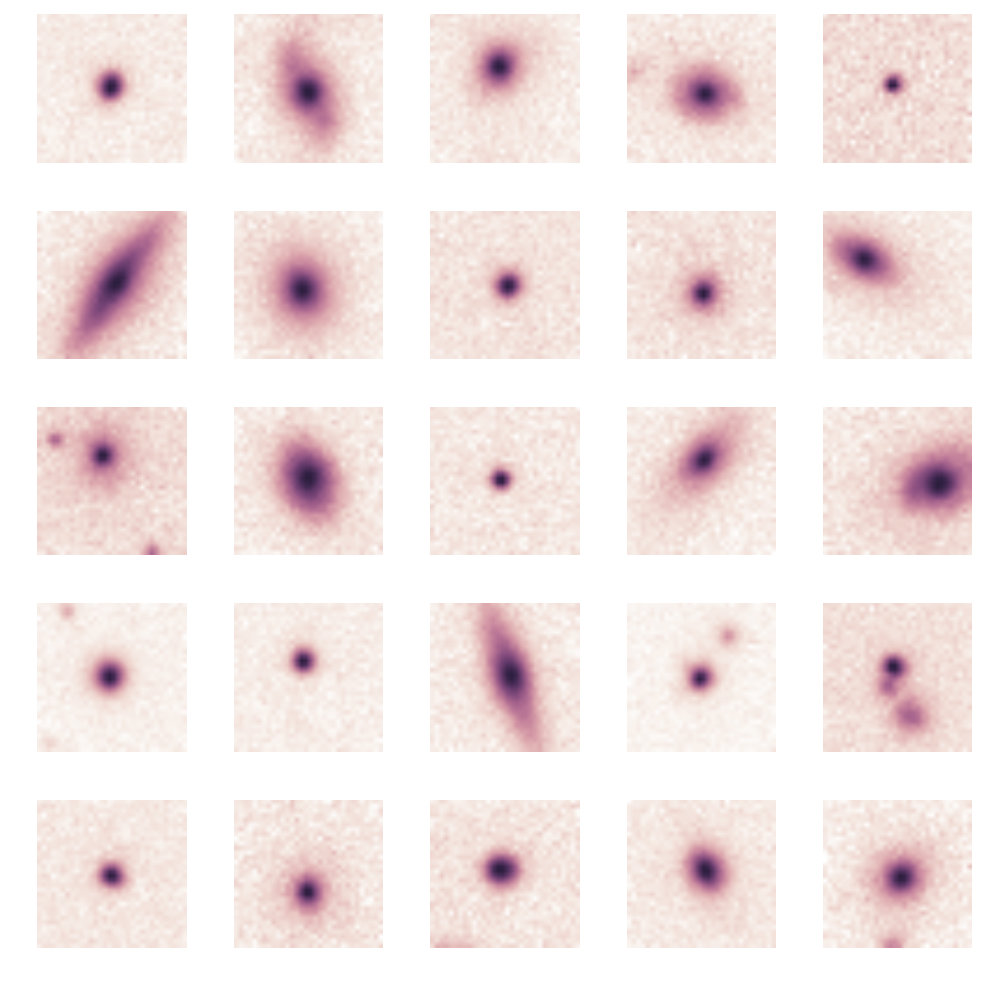

In [5]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = 255 * X_train[i, 1, :, :]
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Generated images ($r$ band)

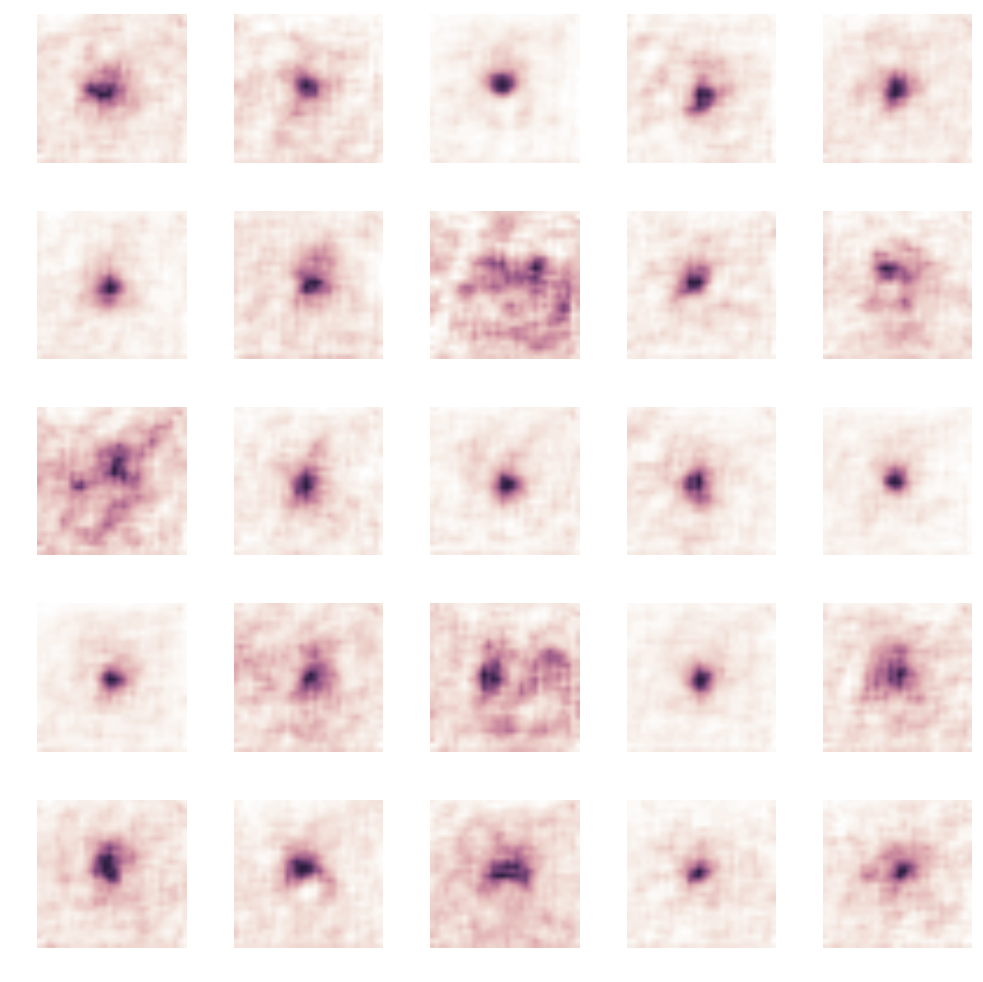

In [6]:
generated = np.load('r_generated_images.npy')

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = 255 * generated[i, 0, :, :]
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
plt.tight_layout()
plt.show()